# 1. 모듈 임포트

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 2. 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('반도체 데이터셋.csv', encoding='cp949')
df1 = df1.iloc[:,1:]
df1

,시점,수출액,수입액,환율,소비자 물가지수,기준금리(연%),국제유가,항공 운임,고용률(%),가동률지수(원지수)
0,2015.01,5262694,3353905,1093.5,94.643,2.00,45.77,1.226,59.0,79.7
1,2015.02,4760336,2822967,1098.4,94.587,2.00,55.69,1.226,59.1,78.9
2,2015.03,5388654,3199381,1109.5,94.596,1.75,54.69,1.128,59.8,88.7
3,2015.04,5162367,3115806,1072.4,94.625,1.75,57.72,1.038,60.6,90.1
4,2015.05,5111415,2892591,1108.2,94.890,1.75,63.02,1.058,61.2,92.2
...,...,...,...,...,...,...,...,...,...,...
79,2021.08,11695023,5311582,1159.5,102.750,0.75,69.50,3.160,61.2,132.3
80,2021.09,12180206,5458903,1184.0,103.170,0.75,72.63,3.160,61.3,130.8
81,2021.10,11173464,5410830,1168.6,103.350,0.75,81.61,2.740,61.4,127.9
82,2021.11,12035996,6046221,1187.9,103.870,1.00,80.30,2.680,61.5,127.8


In [4]:
df1.describe()

,시점,수출액,수입액,환율,소비자 물가지수,기준금리(연%),국제유가,항공 운임,고용률(%),가동률지수(원지수)
count,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000
mean,2018.065000,7.986605e+06,3.803596e+06,1144.058333,98.476940,1.244048,55.66500,1.579476,60.596429,112.104762
std,2.012312,2.249697e+06,7.510954e+05,42.219350,2.478499,0.430355,13.27462,0.855005,0.900127,12.145344
min,2015.010000,4.151085e+06,2.799589e+06,1063.500000,94.587000,0.500000,20.39000,0.874000,57.400000,78.900000
25%,2016.097500,5.771093e+06,3.248737e+06,1114.725000,96.244500,1.000000,45.77000,0.974000,60.100000,106.625000
50%,2018.065000,8.001840e+06,3.699834e+06,1139.450000,98.907500,1.250000,55.65000,1.160000,60.900000,114.600000
75%,2020.032500,9.522134e+06,4.143235e+06,1181.525000,100.041000,1.500000,64.67000,1.635000,61.300000,120.300000
max,2021.120000,1.278066e+07,6.356192e+06,1238.500000,104.040000,2.000000,81.61000,3.200000,61.700000,136.300000


In [5]:
y = df1['수입액']
df2 = df1.drop(['시점','수입액','수출액'], axis=1)
X = df2

# 3. 선형회귀 모델 - OLS

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

# (1) 선형회귀 모델 가정 확인하기
X_train = sm.add_constant(X_train)  
# add_constant: 베타0을 구성될 수 있도록 임의의 1로 된 벡터를 컬럼에 추가
model = sm.OLS(y_train, X_train, axis=1) # 모델 선언
model_trained = model.fit() # 모델 학습

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


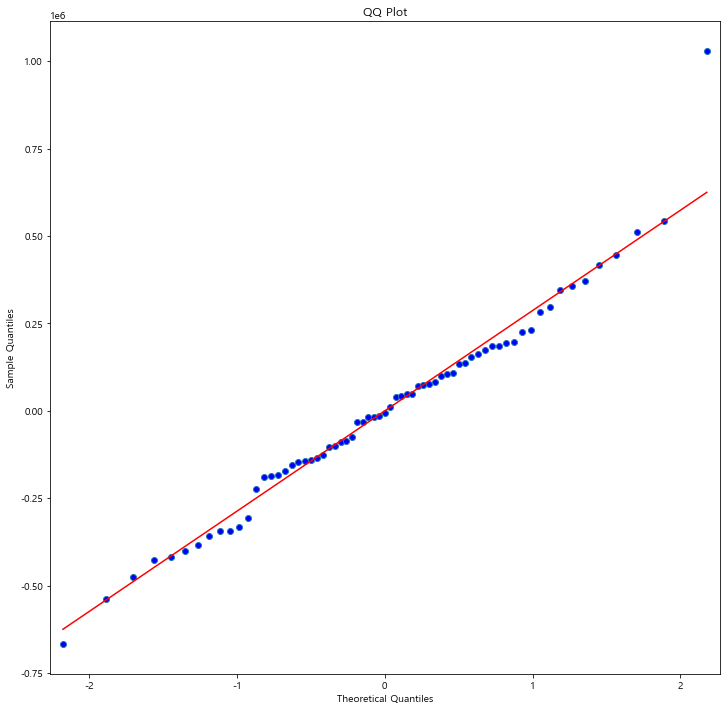

In [7]:
# (2) 확률오차의 정규성 확인

model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False  # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\0528x\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

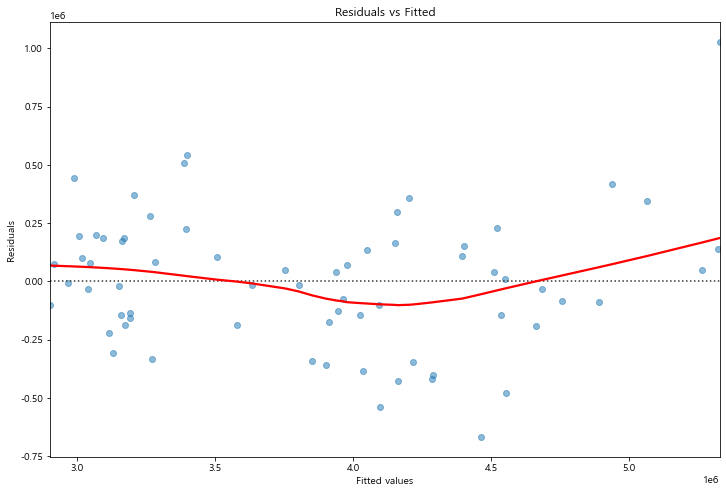

In [8]:
# (3) 확률 오차의 등분산성 확인

model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True,
             scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [9]:
# (4) 통계적으로 설명 (해석)
# - R-squared(결정계수): 모형의 성능
# - coef(회귀계수) : X가 한 단위 증가할 때, Y의 변화량
# - P > [t] (p-value) : 0.05(유의수준) 이하일 때 변수가 유의미

model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수입액   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     46.63
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           9.93e-22
Time:                        14:26:16   Log-Likelihood:                -937.07
No. Observations:                  67   AIC:                             1890.
Df Residuals:                      59   BIC:                             1908.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.037e+07    4.6e+06     -4.430      0.000   -2.96e+07   -1.12e+07
환율           -75.5528   1107.026     -0.068      0.946   -2290.707    2139.601
소비자 물가지수    1.785e+05   3.53e+04      5.060      0.000    1.08e+05    2.49e+05
기준금리(연%)     8.08e+05   2.34e+05      3.460      0.001    3.41e+05    1.28e+06
국제유가       -2849.3534   5764.934     -0.494      0.623   -1.44e+04    8686.253
항공 운임       5.835e+05   1.11e+05      5.267      0.000    3.62e+05    8.05e+05
고용률(%)      6.494e+04   5.52e+04      1.176      0.244   -4.56e+04    1.75e+05
가동률지수(원지수)  8705.3924   4777.139      1.822      0.073    -853.642    1.83e+04
==============================================================================
Omnibus:                        6.569   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.878
Skew:                           0.455   Prob(JB):                       0.0321
Kurtosis:                       4.280   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value > 0.05인 피처 제외하기

p-value가 높은 순서대로 하나씩 넣어서 제외하기

In [12]:
# 모델 선언
model = sm.OLS(y_train, X_train.drop(['환율','국제유가','고용률(%)'], axis=1))

# 모델 학습
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수입액   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     83.32
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.12e-24
Time:                        14:26:43   Log-Likelihood:                -937.89
No. Observations:                  67   AIC:                             1886.
Df Residuals:                      62   BIC:                             1897.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.576e+07   2.11e+06     -7.473      0.000      -2e+07   -1.15e+07
소비자 물가지수    1.672e+05   2.41e+04      6.929      0.000    1.19e+05    2.15e+05
기준금리(연%)    7.697e+05   1.94e+05      3.968      0.000    3.82e+05    1.16e+06
항공 운임       5.568e+05   1.07e+05      5.206      0.000    3.43e+05    7.71e+05
가동률지수(원지수)  1.126e+04   3936.786      2.861      0.006    3395.018    1.91e+04
==============================================================================
Omnibus:                        4.503   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.730
Skew:                           0.418   Prob(JB):                        0.155
Kurtosis:                       3.799   Cond. No.                     8.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`수입액 = 1.672e+05 * 소비자 물가지수 + 7.697e+05 * 기준금리(연%) + 5.568e+05 * 항공 운임 + 1.126e+04 * 가동률지수(원지수) - 1.576e+07`

# 5. 예측 : 미래의 반응변수 값 예측하기

In [13]:
X_test = sm.add_constant(X_test)

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
print(y_train.max())
print(y_train.min())

6356192
2799589


In [16]:
print(y_train_pred.max())
print(y_train_pred.min())

5374199.910765252
2879069.3693598406


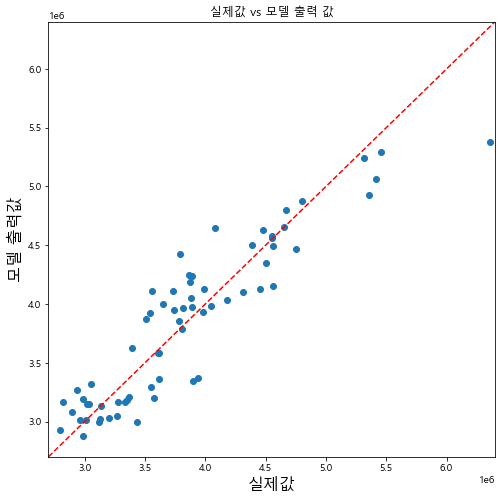

In [17]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([2.7e6, 6.4e6], [2.7e6, 6.4e6], ls='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력값', size=16)
plt.xlim(2.7e6, 6.4e6)
plt.ylim(2.7e6, 6.4e6)
plt.show()

In [23]:
y_test_pred = model_trained.predict(X_test.drop(['환율','국제유가','고용률(%)'], axis=1))
y_test_pred.head() # 예측 결과

40    3.864139e+06
42    3.886155e+06
49    3.838084e+06
37    3.693909e+06
20    3.096775e+06
dtype: float64

### 6. 해당 모델의 성능 정량적 지표로 도출

In [24]:
## 학습용 데이터셋
print('학습용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_train, y_train_pred)))

학습용 데이터셋 결과
MSE: 84392591466.461
RMSE: 290504.030
MAE: 226176.344
R2_Score: 0.843


In [25]:
## 테스트용 데이터셋
print('테스트용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_test, y_test_pred)))

테스트용 데이터셋 결과
MSE: 135476203798.491
RMSE: 368070.922
MAE: 306412.937
R2_Score: 0.770


# Linear Regression 사용

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()

# print(lr.get_params().keys())
# dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

param_grid = {'fit_intercept': [True, False],
             'normalize': [False, True],
             }

grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=3, refit=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

grid_lr.fit(X_train, y_train)
y_pred = grid_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('최적의 파라미터', grid_lr.best_params_)
print('최고 성능', grid_lr.best_score_)


print('mse:', mse)
print('r2_score:', r2)

최적의 파라미터 {'fit_intercept': True, 'normalize': False}
최고 성능 0.773232827834712
mse: 94545527564.48444
r2_score: 0.8435590552063811


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('mse:', mse)
print('r2_score:', r2)

mse: 94545527564.48444
r2_score: 0.8435590552063811


In [28]:
lr.coef_

array([-2.53759593e+02,  1.78819468e+05,  7.96039999e+05, -3.94028944e+03,
        5.58837876e+05,  6.01683572e+04,  9.74099278e+03])

In [29]:
lr.intercept_

-19903540.079455864

# 실제 2022년 1~2월 데이터 회귀식에 대입해보기

In [30]:
# 환율 2022-2월 데이터는 우리은행 외환센터 2022년 2월 평균 매매기준율 데이터사용
# 반도체 항공운임 2022-1~2월 데이터는 최근 2년 평균치 사용

# 수출액 = -1.889e+04 * 환율 + 8.713e+05 * 소비자물가지수 + -7.532e+05 * 항공운임 + 3.995e+04 * 가동률지수(원지수) + -5.94e+07

test_set = pd.read_csv('datasets/Test_반도체.csv')
test_set

,시점,수출액,수입액,환율,소비자 물가지수,기준금리(연%),항공운임,가동률지수(원지수),고용률
0,2022.01,10816657,5739959,1205.50,104.69,1.25,2.79,122.9,59.6
1,2022.02,10381788,5493588,1197.83,105.30,1.25,2.85,122.6,60.6


**2022년 1월**

In [34]:
income_2022_01 = 1.672e+05 * test_set.iloc[0,4] + 7.697e+05 * test_set.iloc[0,5] + 5.568e+05 * test_set.iloc[0,6] + 1.126e+04 * test_set.iloc[0,7] - 1.576e+07

print('예측 2022년 1월 수출액:', int(income_2022_01))
print('실제 2022년 1월 수출액:', test_set.iloc[0,2])

예측 2022년 1월 수출액: 5643619
실제 2022년 1월 수출액: 5739959


**2022년 2월**

In [35]:
income_2022_02 = 1.672e+05 * test_set.iloc[1,4] + 7.697e+05 * test_set.iloc[1,5] + 5.568e+05 * test_set.iloc[1,6] + 1.126e+04 * test_set.iloc[1,7] - 1.576e+07

print('예측 2022년 2월 수출액:', int(income_2022_02))
print('실제 2022년 2월 수출액:', test_set.iloc[1,2])

예측 2022년 2월 수출액: 5775641
실제 2022년 2월 수출액: 5493588
